Мы работаем аналитиками в авиакомпании G6, осуществляющей авиаперевозки внутри России. Мы хотим изучить поведение покупателей, приобретающих билеты на разные направления.

Нам нужно познакомиться с базой данных и изучить спрос пассажиров на рейсы в города крупнейших культурных фестивалей.

**Аналитика средствами Python**

В нашем распоряжении есть файлы, которые мы получили делая запросы на языке SQL, обращаясь к базе данных с информацией о покупках билетов.

**query_1.csv** — результат первого запроса. В нём такая информация:

- *model* — **модель самолета;
- *flights_amount* — количество рейсов для каждой модели самолетов *model* в сентябре 2018 года.

**query_3.csv** — результат третьего запроса. В нём содержится такая информация:

- *city* — город;
- *average_flights* — среднее количество рейсов, прибывающих в город (*city*) за день в сентябре 2018 года.

# Аналитика

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'

Загрузим данные. Результаты первого запроса назовем model_flights.

In [2]:
model_flights = pd.read_csv('/datasets/query_1.csv')
model_flights

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [3]:
model_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


Таблица содержит информацию о количестве рейсов, выполненных каждой моделью самолетов авиакомпании в сентябре 2018 года.

Типы данных корректные.

Результаты третьего запроса назовем city_fights.

In [4]:
city_flights = pd.read_csv('/datasets/query_3.csv')
city_flights

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


In [5]:
city_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


В этой таблице содержится информация о среднем количестве рейсов в день, выполненных в каждый город в сентябре 2018 года.

Типы данных корректные.

Построим график.

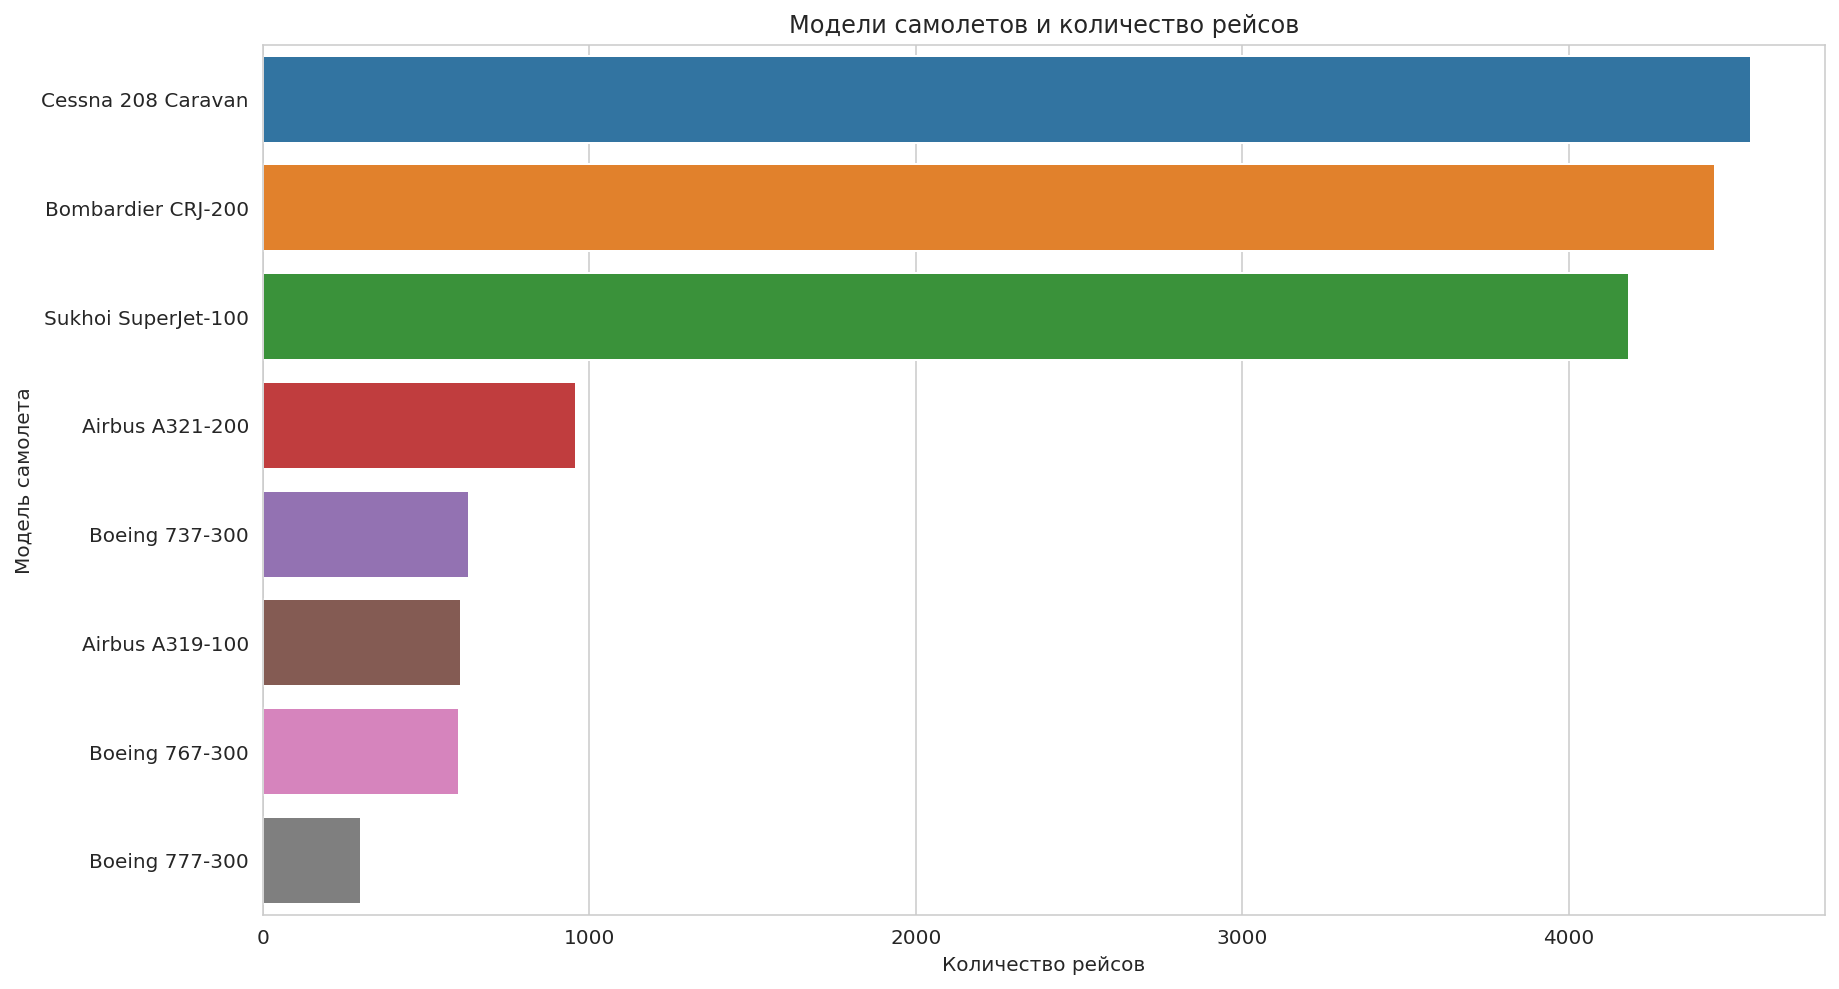

In [6]:
sns.set_style('whitegrid')
plt.subplots(figsize=(14,8))
sns.barplot(data=model_flights.sort_values('flights_amount',ascending=False), 
            y='model', x='flights_amount', orient='h')
plt.title('Модели самолетов и количество рейсов')
plt.xlabel('Количество рейсов')
plt.ylabel('Модель самолета');

Из графика видно, что у нашей авиакомпании есть 3 наиболее часто используемых модели самолета - Cessna 208 Caravan, Bombardier CRj-200, SSJ-100, выполнивших более 4000 рейсов в сентябре каждая.  Остальные модели использовались гораздо менее интенсивно.

Модели самолетов могут нам рассказать о том, что авиакомпания, главным образом, осуществляет региональные и ближнемагистральные перевозки.

Построим следующий график.

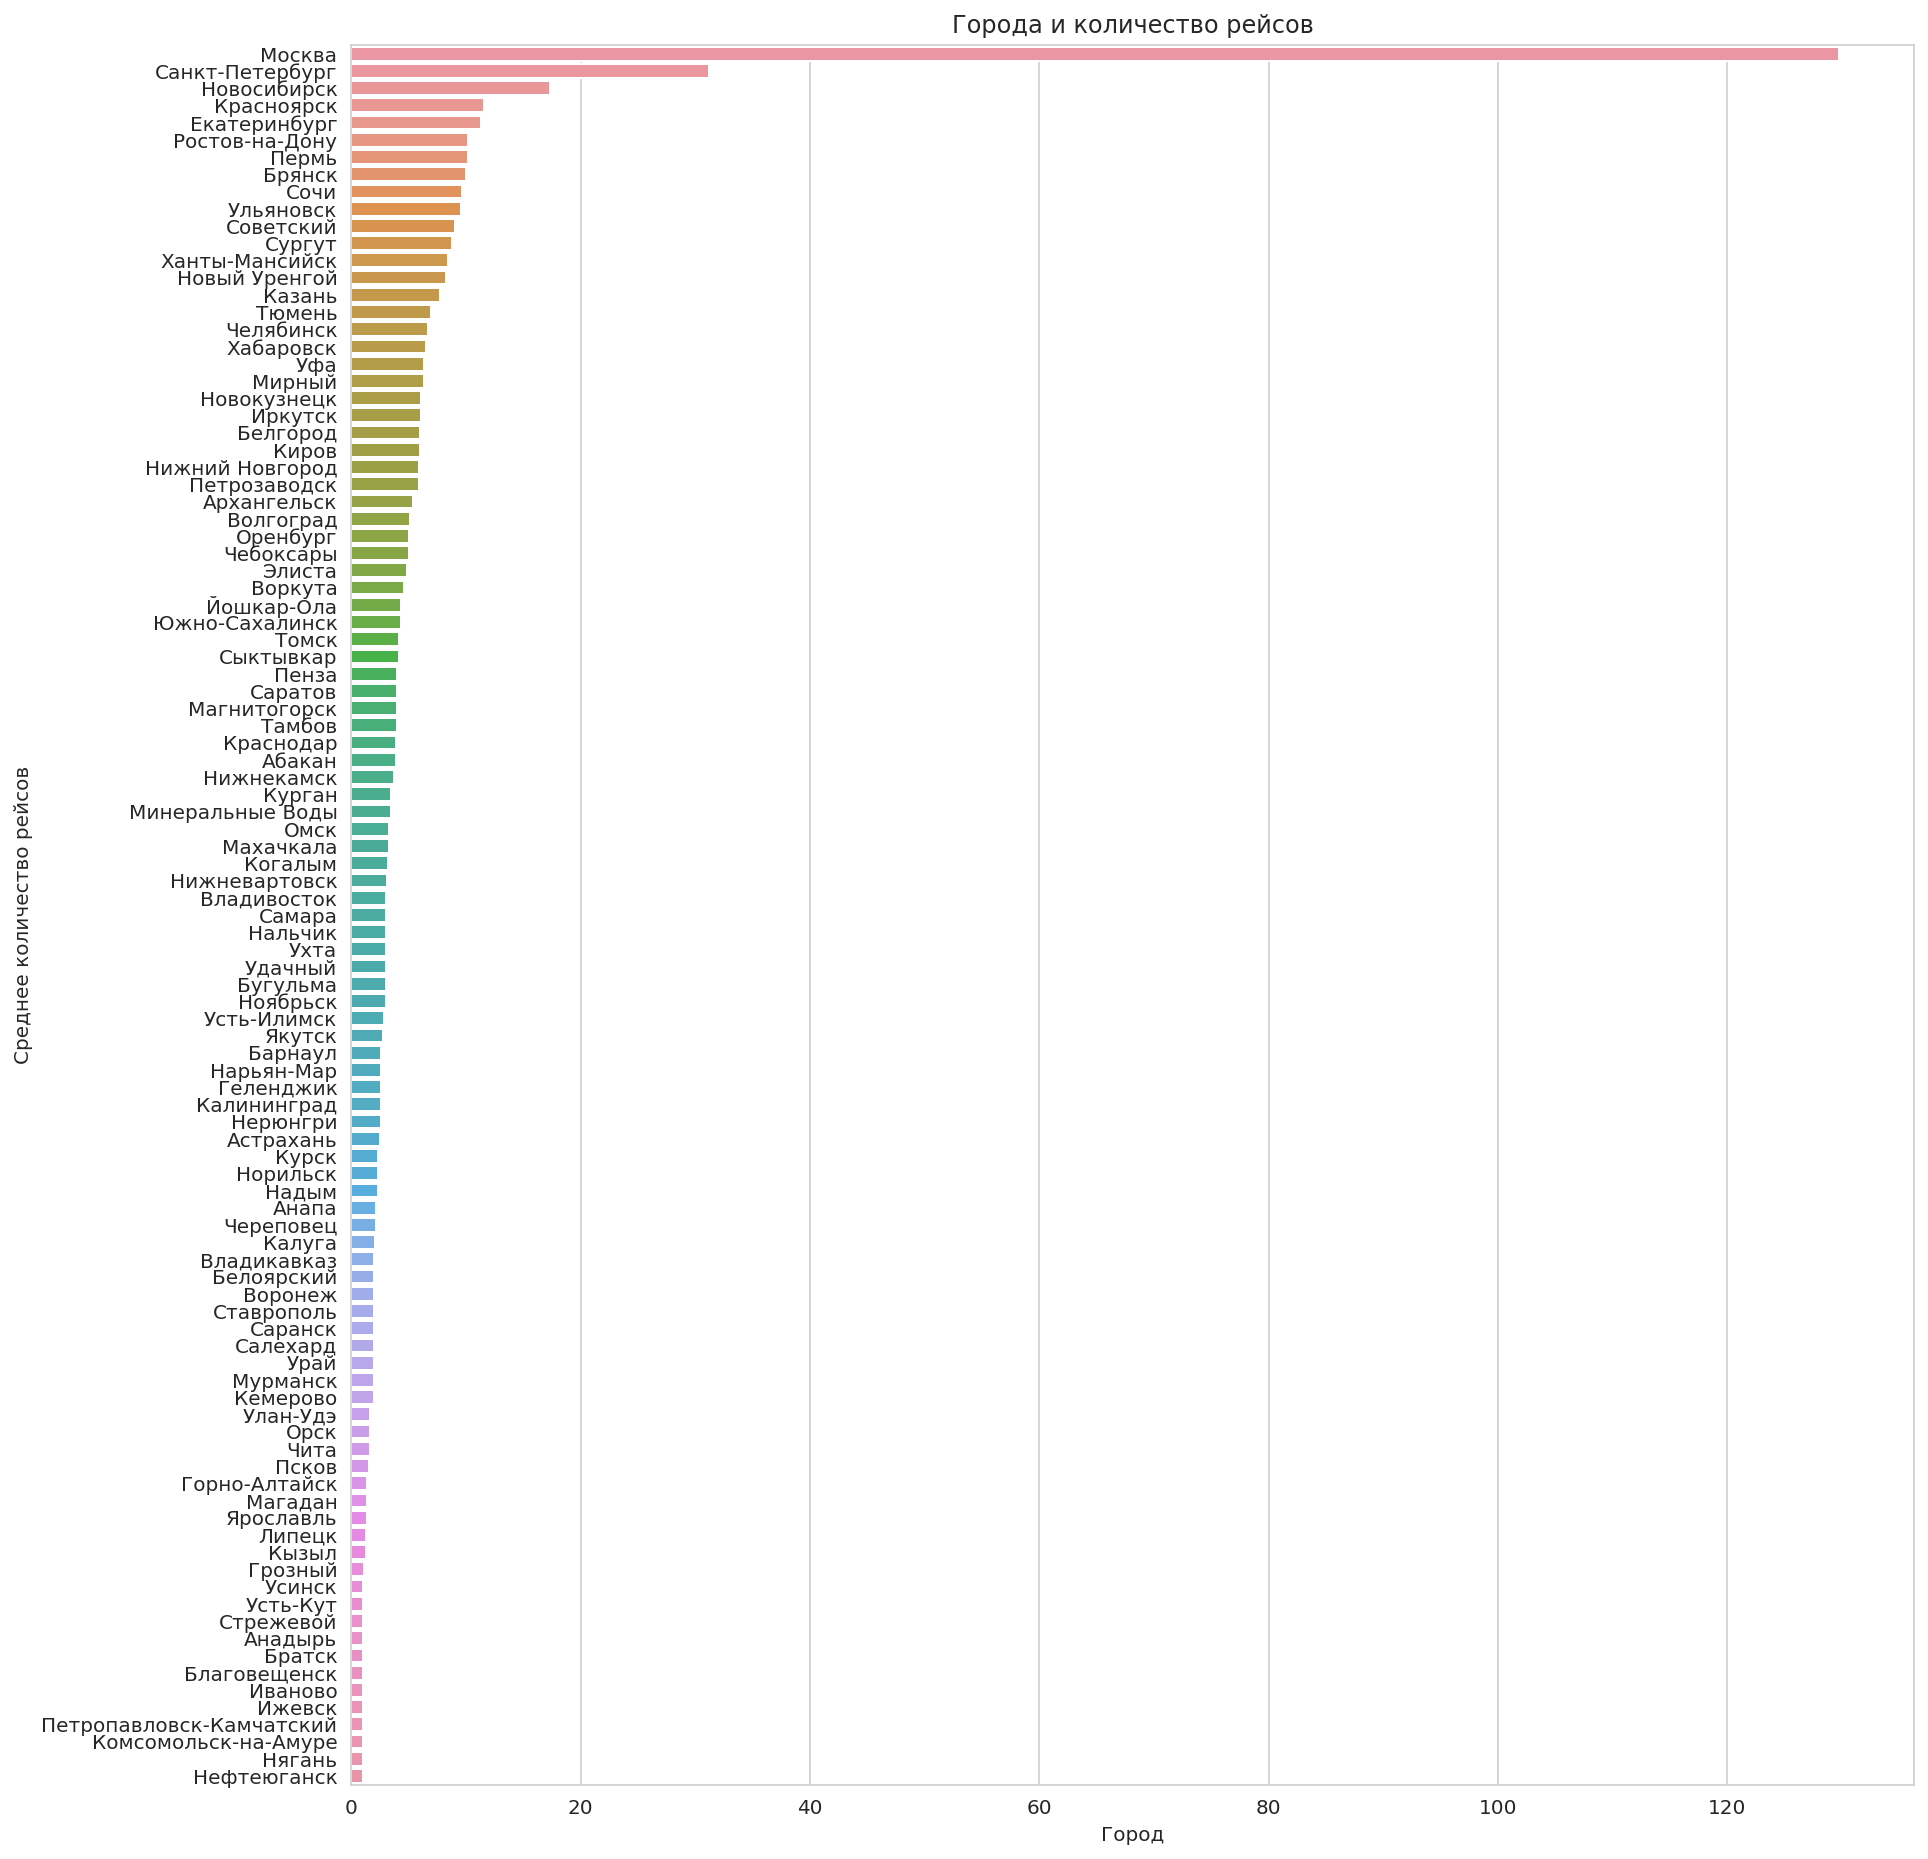

In [7]:
plt.subplots(figsize=(14,16))
sns.barplot(data=city_flights.sort_values('average_flights',ascending=False), 
            y='city', x='average_flights', orient='h')
plt.title('Города и количество рейсов')
plt.xlabel('Город')
plt.ylabel('Среднее количество рейсов');

У нас 101 город, в который авиакомпания выполняла рейсы в сентябре 2018 года и отображение их всех на графике малоинформативно. Видно, что выделяется Москва, у остальных городов рейсов прибытия намного меньше. Достаточно полезной информацией может быть тот факт, что Комсомольск-на-Амуре, Нягань и Нефтеюганск (и еще ряд городов) являются наименее поплуряными городами.

Поэтому построим третий график, где выберем только 10 наиболее популярных городов.

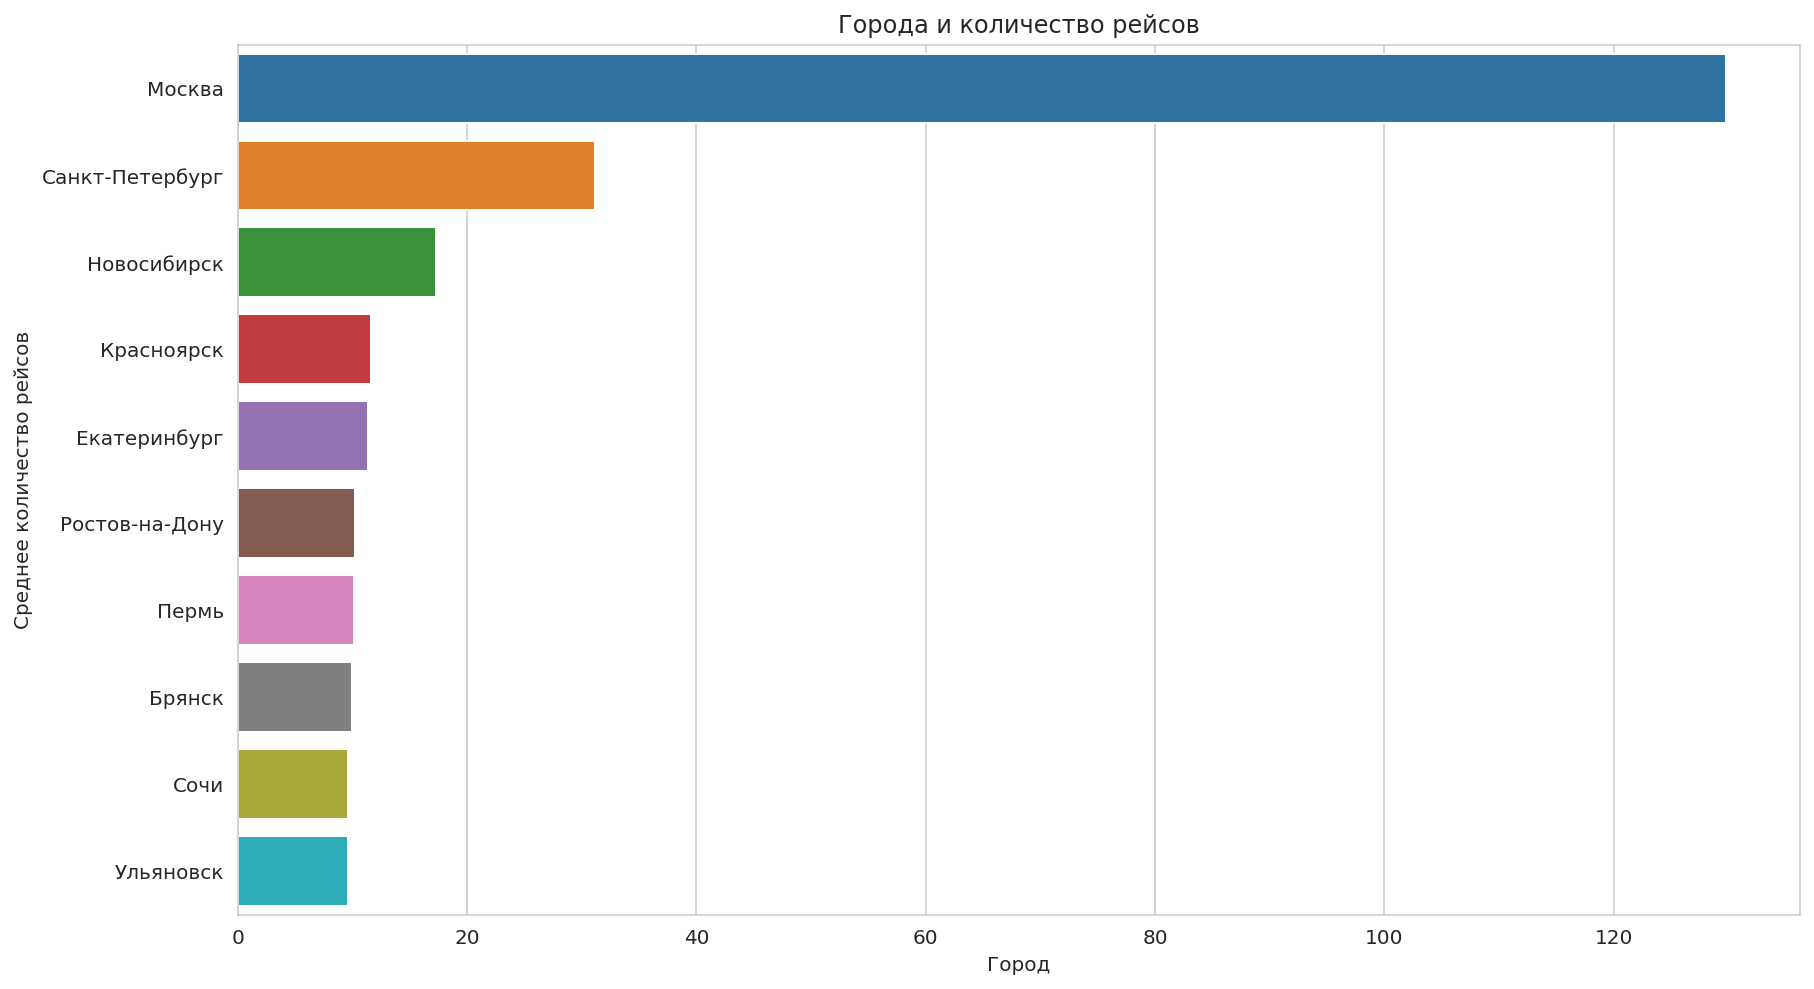

In [8]:
plt.subplots(figsize=(14,8))
sns.barplot(data=city_flights.sort_values('average_flights',ascending=False).head(10), 
            y='city', x='average_flights', orient='h')
plt.title('Города и количество рейсов')
plt.xlabel('Город')
plt.ylabel('Среднее количество рейсов');

Видно, что в Москву в среднем прилетает около 130 рейсов, в Санкт-Петербург - около 30, в Новосибирск - чуть менее 20. Остальные популярные города принимали в среднем около 10 рейсов в день, среди которых есть представители Сибири, Урала и центральной и южной части России.

Из этой информации можно сделать вывод о том, что, по всей видимости, хаб нашей авиакомпании находится в Москве.

# Вывод

После анализа двух небольших таблиц мы получили следующую информацию о сентябре 2018 года:
 - Самые часто используемые самолеты Cessna 208 Caravan, Bombardier CRJ-200, SSJ-100,
 - Самые популярные города - Москва, Санкт-Петербург, Новосибирск,
 - Авиакомпания, вероятнее всего, специализируется на ближнемагистральных и региональных перевозках,
 - Хаб, вероятно, находится в Москве.